In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df= pd.read_csv("UCI_Credit_Card.csv")

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.drop(columns=["ID"], inplace= True)

In [6]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [8]:
df.duplicated().sum()

35

In [9]:
print(df[['SEX', 'MARRIAGE', 'default.payment.next.month']].corr())

                                 SEX  MARRIAGE  default.payment.next.month
SEX                         1.000000 -0.031389                   -0.039961
MARRIAGE                   -0.031389  1.000000                   -0.024339
default.payment.next.month -0.039961 -0.024339                    1.000000


In [10]:
df = pd.get_dummies(df, columns=["SEX", "EDUCATION", "MARRIAGE"], drop_first=True)


In [11]:
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,True,False,True,False,False,False,False,True,False,False
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,True,False,True,False,False,False,False,False,True,False
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,True,False,True,False,False,False,False,False,True,False
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,True,False,True,False,False,False,False,True,False,False
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,False,False,True,False,False,False,False,True,False,False


In [12]:
#Debt-to-income ratio(DTI)

df["DTI"] = df["BILL_AMT1"] / df["LIMIT_BAL"]


In [13]:
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,DTI
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,False,True,False,False,False,False,True,False,False,0.195650
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,False,True,False,False,False,False,False,True,False,0.022350
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,False,True,False,False,False,False,False,True,False,0.324878
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,False,True,False,False,False,False,True,False,False,0.939800
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,False,True,False,False,False,False,True,False,False,0.172340


In [14]:
df["AVG_BILL_AMT"] = df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3",  "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].mean(axis=1)
df["DTI"] = df["AVG_BILL_AMT"] / df["LIMIT_BAL"]
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,DTI,AVG_BILL_AMT
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,True,False,False,False,False,True,False,False,0.064200,1284.000000
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,True,False,False,False,False,False,True,False,0.023718,2846.166667
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,True,False,False,False,False,False,True,False,0.188246,16942.166667
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,True,False,False,False,False,True,False,False,0.771113,38555.666667
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,True,False,False,False,False,True,False,False,0.364463,18223.166667


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["DTI"] = scaler.fit_transform(df[["DTI"]])
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,DTI,AVG_BILL_AMT
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,True,False,False,False,False,True,False,False,0.053028,1284.000000
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,True,False,False,False,False,False,True,False,0.045795,2846.166667
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,True,False,False,False,False,False,True,False,0.075191,16942.166667
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,True,False,False,False,False,True,False,False,0.179332,38555.666667
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,True,False,False,False,False,True,False,False,0.106676,18223.166667


In [16]:
df["AVG_PAY_AMT"] = df[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].mean(axis=1)


In [17]:
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,DTI,AVG_BILL_AMT,AVG_PAY_AMT
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,False,False,False,False,True,False,False,0.053028,1284.000000,114.833333
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,False,False,False,False,False,True,False,0.045795,2846.166667,833.333333
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,False,False,False,False,False,True,False,0.075191,16942.166667,1836.333333
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,False,False,False,False,True,False,False,0.179332,38555.666667,1398.000000
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,False,False,False,False,True,False,False,0.106676,18223.166667,9841.500000


In [18]:
#Repayment consistency

df["OVERDUE_COUNT"] = (df[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]] > 0).sum(axis=1)
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,DTI,AVG_BILL_AMT,AVG_PAY_AMT,OVERDUE_COUNT
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,False,False,False,True,False,False,0.053028,1284.000000,114.833333,2
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,False,False,False,False,True,False,0.045795,2846.166667,833.333333,2
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,False,False,False,False,True,False,0.075191,16942.166667,1836.333333,0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,False,False,False,True,False,False,0.179332,38555.666667,1398.000000,0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,False,False,False,True,False,False,0.106676,18223.166667,9841.500000,0


In [19]:
numerical_columns = ["LIMIT_BAL", "AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", 
                     "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", 
                     "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", 
                     "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "AVG_PAY_AMT"]
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,DTI,AVG_BILL_AMT,AVG_PAY_AMT,OVERDUE_COUNT
0,0.010101,0.051724,2,2,-1,-1,-2,-2,0.149982,0.069164,...,False,False,False,True,False,False,0.053028,1284.000000,0.000183,2
1,0.111111,0.086207,-1,2,0,0,0,2,0.148892,0.067858,...,False,False,False,False,True,False,0.045795,2846.166667,0.001328,2
2,0.080808,0.224138,0,0,0,0,0,0,0.172392,0.079532,...,False,False,False,False,True,False,0.075191,16942.166667,0.002927,0
3,0.040404,0.275862,0,0,0,0,0,0,0.188100,0.111995,...,False,False,False,True,False,False,0.179332,38555.666667,0.002228,0
4,0.040404,0.620690,-1,0,-1,0,0,0,0.154144,0.071601,...,False,False,False,True,False,False,0.106676,18223.166667,0.015688,0


In [20]:
df["AVG_BILL_AMT"] = scaler.fit_transform(df[["AVG_BILL_AMT"]])
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,DTI,AVG_BILL_AMT,AVG_PAY_AMT,OVERDUE_COUNT
0,0.010101,0.051724,2,2,-1,-1,-2,-2,0.149982,0.069164,...,False,False,False,True,False,False,0.053028,0.061420,0.000183,2
1,0.111111,0.086207,-1,2,0,0,0,2,0.148892,0.067858,...,False,False,False,False,True,False,0.045795,0.063094,0.001328,2
2,0.080808,0.224138,0,0,0,0,0,0,0.172392,0.079532,...,False,False,False,False,True,False,0.075191,0.078197,0.002927,0
3,0.040404,0.275862,0,0,0,0,0,0,0.188100,0.111995,...,False,False,False,True,False,False,0.179332,0.101353,0.002228,0
4,0.040404,0.620690,-1,0,-1,0,0,0,0.154144,0.071601,...,False,False,False,True,False,False,0.106676,0.079569,0.015688,0


In [21]:
x = df.drop(columns=["default.payment.next.month"])
y = df["default.payment.next.month"]


In [22]:
df.to_csv("clean_df.csv", index=False)

In [23]:
#EDA

In [24]:
# Basic info and summary statistics
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   AGE                         30000 non-null  float64
 2   PAY_0                       30000 non-null  int64  
 3   PAY_2                       30000 non-null  int64  
 4   PAY_3                       30000 non-null  int64  
 5   PAY_4                       30000 non-null  int64  
 6   PAY_5                       30000 non-null  int64  
 7   PAY_6                       30000 non-null  int64  
 8   BILL_AMT1                   30000 non-null  float64
 9   BILL_AMT2                   30000 non-null  float64
 10  BILL_AMT3                   30000 non-null  float64
 11  BILL_AMT4                   30000 non-null  float64
 12  BILL_AMT5                   30000 non-null  float64
 13  BILL_AMT6                   300

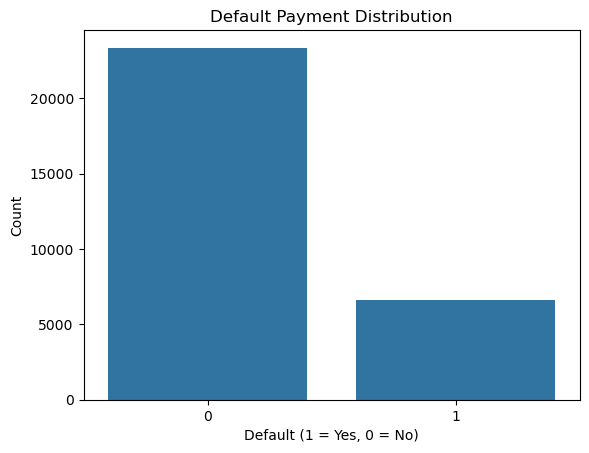

In [25]:
# Distribution of target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="default.payment.next.month", data=df)
plt.title("Default Payment Distribution")
plt.xlabel("Default (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

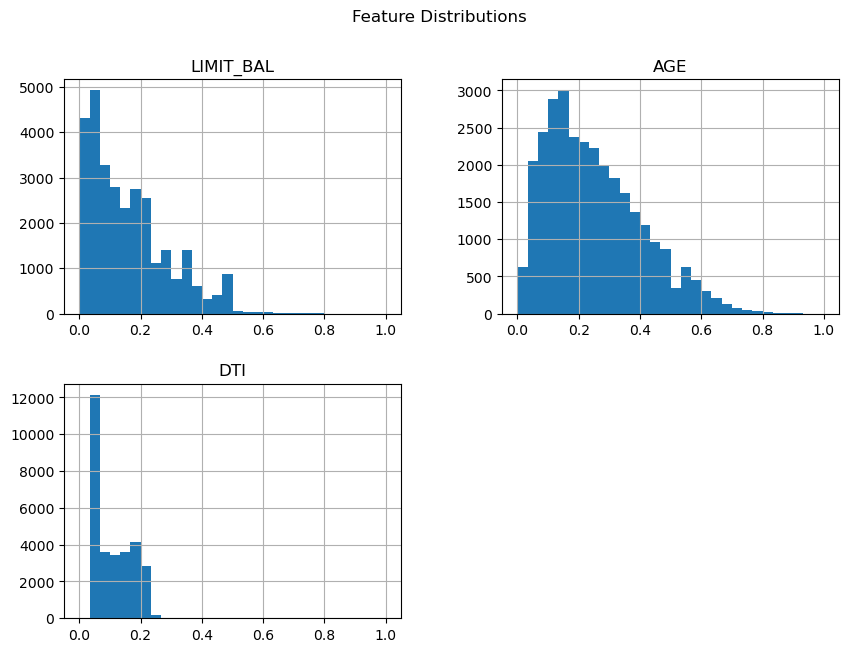

In [26]:
#Univariate analysis
# Plot distribution of key numerical features
numerical_features = ["LIMIT_BAL", "AGE", "DTI"]
df[numerical_features].hist(bins=30, figsize=(10, 7))
plt.suptitle("Feature Distributions")
plt.show()


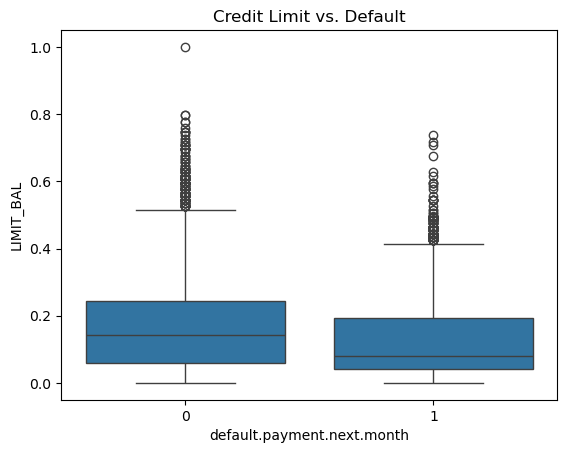

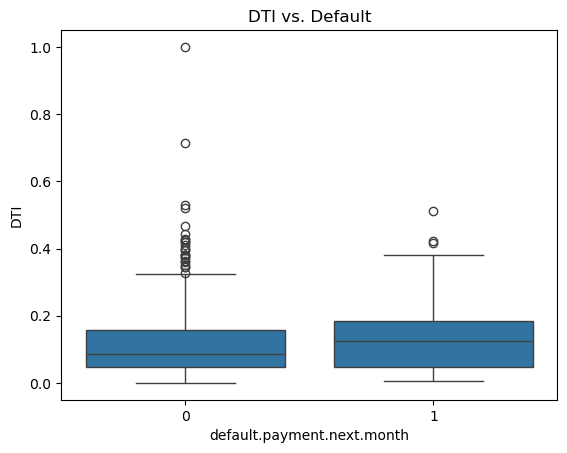

In [27]:
# Bivariate analysis

sns.boxplot(x="default.payment.next.month", y="LIMIT_BAL", data=df)
plt.title("Credit Limit vs. Default")
plt.show()

sns.boxplot(x="default.payment.next.month", y="DTI", data=df)
plt.title("DTI vs. Default")
plt.show()

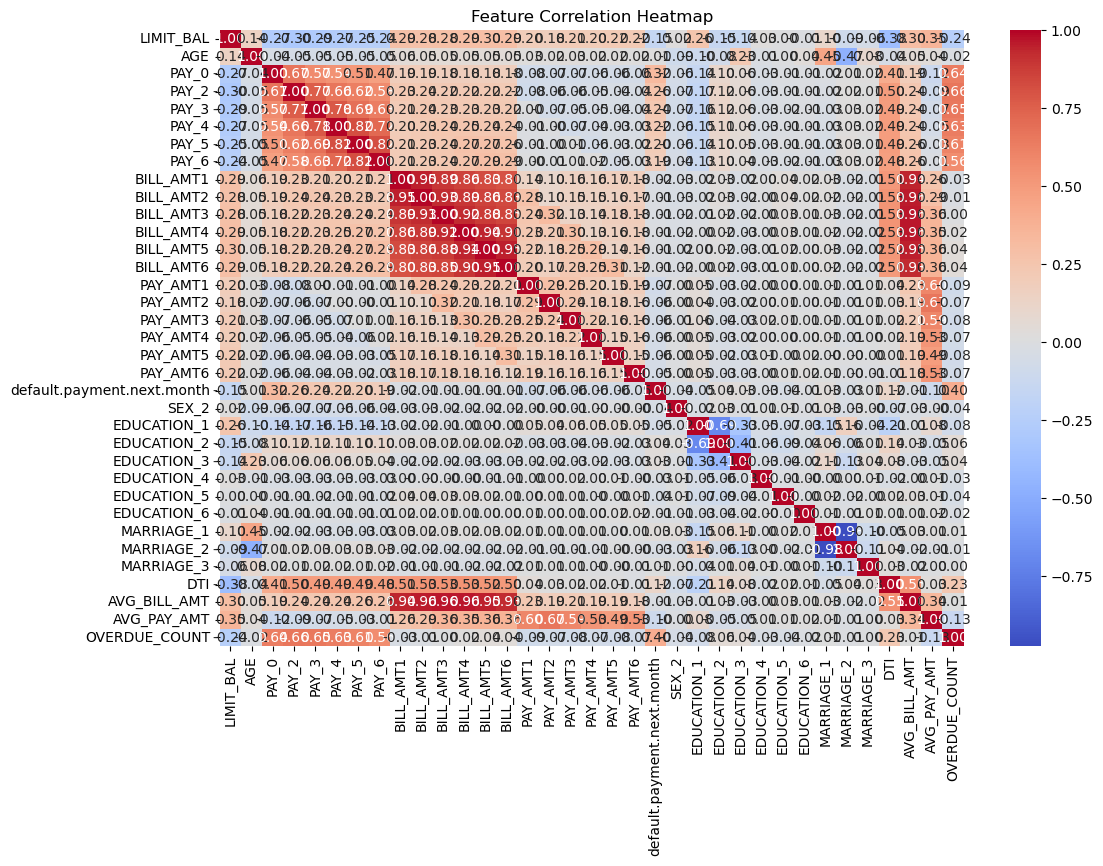

In [28]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   AGE                         30000 non-null  float64
 2   PAY_0                       30000 non-null  int64  
 3   PAY_2                       30000 non-null  int64  
 4   PAY_3                       30000 non-null  int64  
 5   PAY_4                       30000 non-null  int64  
 6   PAY_5                       30000 non-null  int64  
 7   PAY_6                       30000 non-null  int64  
 8   BILL_AMT1                   30000 non-null  float64
 9   BILL_AMT2                   30000 non-null  float64
 10  BILL_AMT3                   30000 non-null  float64
 11  BILL_AMT4                   30000 non-null  float64
 12  BILL_AMT5                   30000 non-null  float64
 13  BILL_AMT6                   300

In [30]:
df = df.drop(columns=["SEX_2", "MARRIAGE_1", "MARRIAGE_2","MARRIAGE_3"])  # Example with trailing spaces


In [31]:
education_cols = [col for col in df.columns if "EDUCATION" in col] #[expression for item in iterable if condition]

df = df.drop(columns=education_cols)

In [32]:
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,DTI,AVG_BILL_AMT,AVG_PAY_AMT,OVERDUE_COUNT
0,0.010101,0.051724,2,2,-1,-1,-2,-2,0.149982,0.069164,...,0.000409,0.000000,0.000000,0.000000,0.000000,1,0.053028,0.061420,0.000183,2
1,0.111111,0.086207,-1,2,0,0,0,2,0.148892,0.067858,...,0.000594,0.001116,0.001610,0.000000,0.003783,1,0.045795,0.063094,0.001328,2
2,0.080808,0.224138,0,0,0,0,0,0,0.172392,0.079532,...,0.000891,0.001116,0.001610,0.002345,0.009458,0,0.075191,0.078197,0.002927,0
3,0.040404,0.275862,0,0,0,0,0,0,0.188100,0.111995,...,0.001199,0.001339,0.001771,0.002506,0.001892,0,0.179332,0.101353,0.002228,0
4,0.040404,0.620690,-1,0,-1,0,0,0,0.154144,0.071601,...,0.021779,0.011160,0.014493,0.001615,0.001284,0,0.106676,0.079569,0.015688,0


C:\Users\adisi\AppData\Local\Temp\ipykernel_10764\2071701323.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


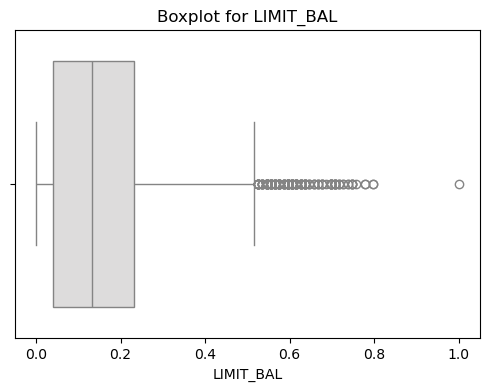

C:\Users\adisi\AppData\Local\Temp\ipykernel_10764\2071701323.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


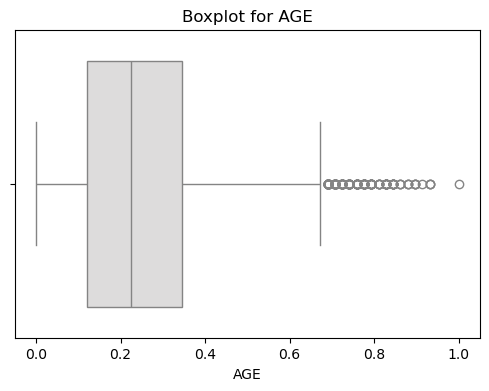

C:\Users\adisi\AppData\Local\Temp\ipykernel_10764\2071701323.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


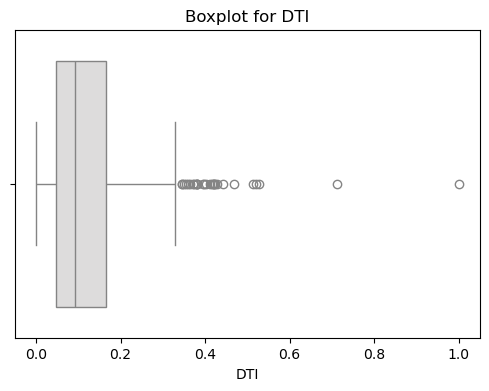

C:\Users\adisi\AppData\Local\Temp\ipykernel_10764\2071701323.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


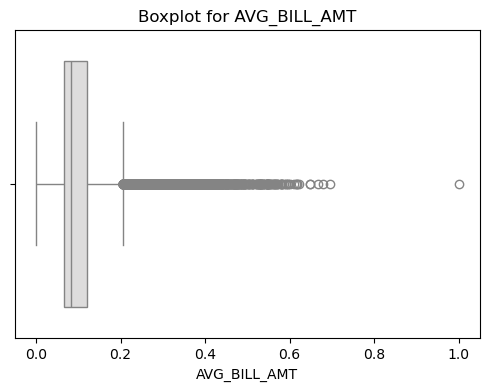

C:\Users\adisi\AppData\Local\Temp\ipykernel_10764\2071701323.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="coolwarm")


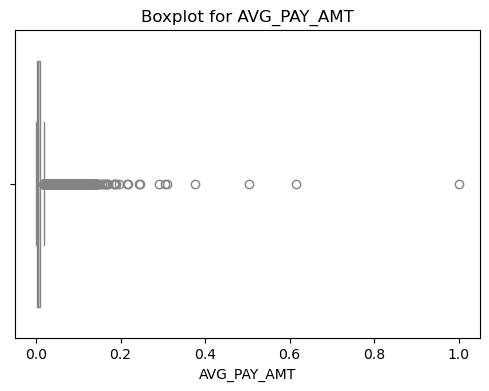

In [33]:

numerical_columns1 = ["LIMIT_BAL", "AGE", "DTI", "AVG_BILL_AMT", "AVG_PAY_AMT"]
for col in numerical_columns1:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, palette="coolwarm")
    plt.title(f"Boxplot for {col}")
    plt.show()


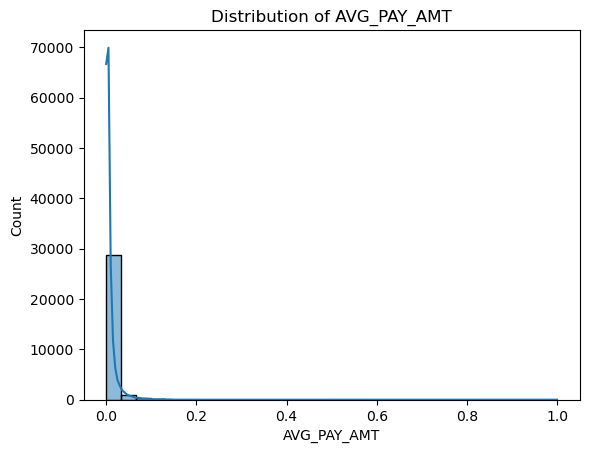

In [34]:


sns.histplot(df["AVG_PAY_AMT"], kde=True, bins=30)
plt.title("Distribution of AVG_PAY_AMT")
plt.show()



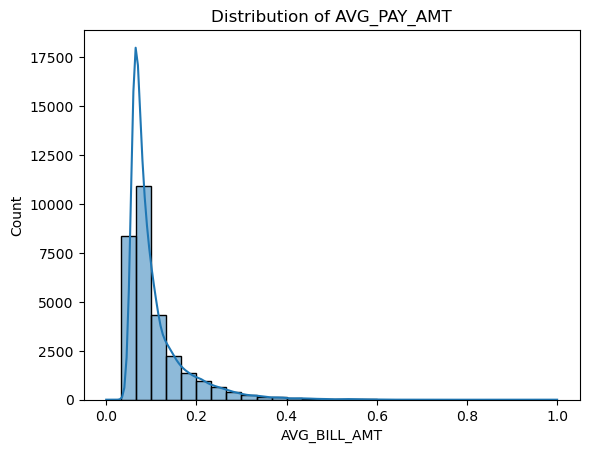

In [35]:
sns.histplot(df["AVG_BILL_AMT"], kde=True, bins=30)
plt.title("Distribution of AVG_PAY_AMT")
plt.show()


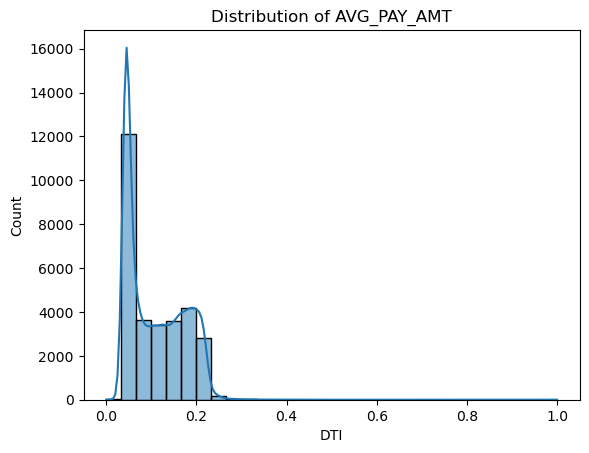

In [36]:
sns.histplot(df["DTI"], kde=True, bins=30)
plt.title("Distribution of AVG_PAY_AMT")
plt.show()

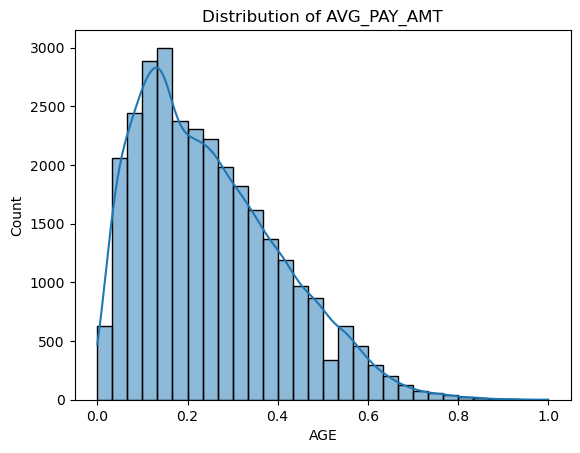

In [37]:
sns.histplot(df["AGE"], kde=True, bins=30)
plt.title("Distribution of AVG_PAY_AMT")
plt.show()

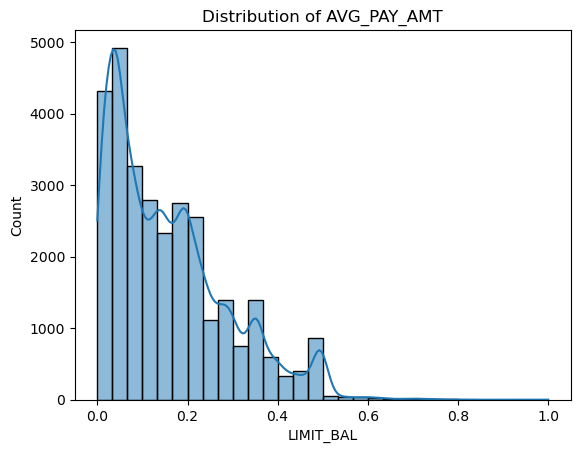

In [38]:
sns.histplot(df["LIMIT_BAL"], kde=True, bins=30)
plt.title("Distribution of AVG_PAY_AMT")
plt.show()

In [39]:
print(df[['AGE', 'default.payment.next.month']].corr())


                                AGE  default.payment.next.month
AGE                         1.00000                     0.01389
default.payment.next.month  0.01389                     1.00000


In [40]:
  # Create age groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 0.3, 0.6, 1.0], labels=["<30", "30-50", ">50"])


C:\Users\adisi\AppData\Local\Temp\ipykernel_10764\3429863825.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="AGE_GROUP", y="default.payment.next.month", data=df, ci=None, palette="viridis")
C:\Users\adisi\AppData\Local\Temp\ipykernel_10764\3429863825.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AGE_GROUP", y="default.payment.next.month", data=df, ci=None, palette="viridis")


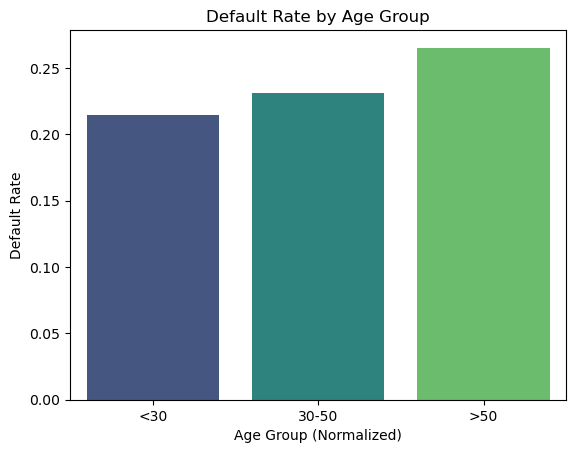

In [41]:
sns.barplot(x="AGE_GROUP", y="default.payment.next.month", data=df, ci=None, palette="viridis")
plt.title("Default Rate by Age Group")
plt.xlabel("Age Group (Normalized)")
plt.ylabel("Default Rate")
plt.show()

In [42]:
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,DTI,AVG_BILL_AMT,AVG_PAY_AMT,OVERDUE_COUNT,AGE_GROUP
0,0.010101,0.051724,2,2,-1,-1,-2,-2,0.149982,0.069164,...,0.000000,0.000000,0.000000,0.000000,1,0.053028,0.061420,0.000183,2,<30
1,0.111111,0.086207,-1,2,0,0,0,2,0.148892,0.067858,...,0.001116,0.001610,0.000000,0.003783,1,0.045795,0.063094,0.001328,2,<30
2,0.080808,0.224138,0,0,0,0,0,0,0.172392,0.079532,...,0.001116,0.001610,0.002345,0.009458,0,0.075191,0.078197,0.002927,0,<30
3,0.040404,0.275862,0,0,0,0,0,0,0.188100,0.111995,...,0.001339,0.001771,0.002506,0.001892,0,0.179332,0.101353,0.002228,0,<30
4,0.040404,0.620690,-1,0,-1,0,0,0,0.154144,0.071601,...,0.011160,0.014493,0.001615,0.001284,0,0.106676,0.079569,0.015688,0,>50


In [43]:
df['AGE_GROUP'] = df['AGE_GROUP'].astype('category')


In [44]:
df= df.drop(columns=['AGE'])

In [45]:
df['AGE_GROUP'] = df['AGE_GROUP'].cat.codes


In [46]:
df.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,DTI,AVG_BILL_AMT,AVG_PAY_AMT,OVERDUE_COUNT,AGE_GROUP
0,0.010101,2,2,-1,-1,-2,-2,0.149982,0.069164,0.086723,...,0.000000,0.000000,0.000000,0.000000,1,0.053028,0.061420,0.000183,2,0
1,0.111111,-1,2,0,0,0,2,0.148892,0.067858,0.087817,...,0.001116,0.001610,0.000000,0.003783,1,0.045795,0.063094,0.001328,2,0
2,0.080808,0,0,0,0,0,0,0.172392,0.079532,0.093789,...,0.001116,0.001610,0.002345,0.009458,0,0.075191,0.078197,0.002927,0,0
3,0.040404,0,0,0,0,0,0,0.188100,0.111995,0.113407,...,0.001339,0.001771,0.002506,0.001892,0,0.179332,0.101353,0.002228,0,0
4,0.040404,-1,0,-1,0,0,0,0.154144,0.071601,0.106020,...,0.011160,0.014493,0.001615,0.001284,0,0.106676,0.079569,0.015688,0,2


In [47]:
selected_columns = ["LIMIT_BAL", "AGE", "DTI", "AVG_BILL_AMT", "AVG_PAY_AMT"]


In [48]:
skewed_features = ["AVG_PAY_AMT", "AVG_BILL_AMT", "DTI"]
for feature in skewed_features:
    df[f"{feature}_LOG"] = np.log1p(df[feature])

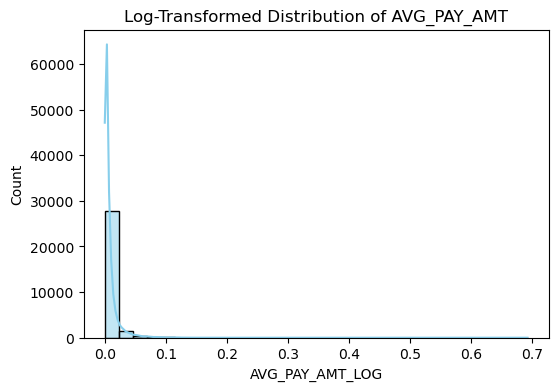

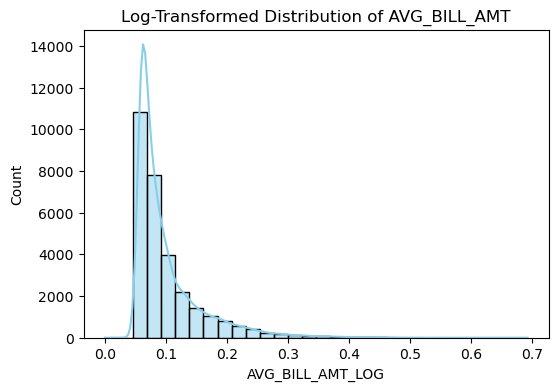

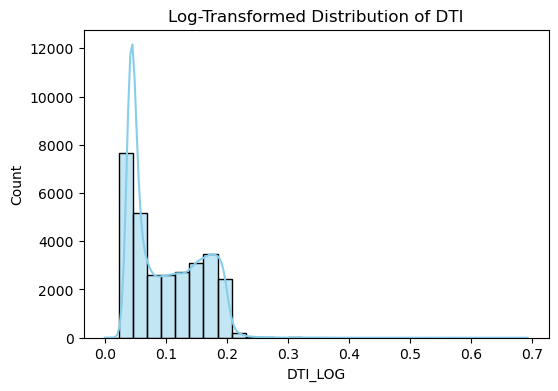

In [49]:
for feature in skewed_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[f"{feature}_LOG"], kde=True, bins=30, color="skyblue")
    plt.title(f"Log-Transformed Distribution of {feature}")
    plt.show()

In [50]:
Q1 = df["LIMIT_BAL"].quantile(0.25)
Q3 = df["LIMIT_BAL"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["LIMIT_BAL"] >= lower_bound) & 
                            (df["LIMIT_BAL"] <= upper_bound)]


In [51]:
df.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,PAY_AMT6,default.payment.next.month,DTI,AVG_BILL_AMT,AVG_PAY_AMT,OVERDUE_COUNT,AGE_GROUP,AVG_PAY_AMT_LOG,AVG_BILL_AMT_LOG,DTI_LOG
0,0.010101,2,2,-1,-1,-2,-2,0.149982,0.069164,0.086723,...,0.000000,1,0.053028,0.061420,0.000183,2,0,0.000183,0.059608,0.051669
1,0.111111,-1,2,0,0,0,2,0.148892,0.067858,0.087817,...,0.003783,1,0.045795,0.063094,0.001328,2,0,0.001327,0.061184,0.044777
2,0.080808,0,0,0,0,0,0,0.172392,0.079532,0.093789,...,0.009458,0,0.075191,0.078197,0.002927,0,0,0.002923,0.075290,0.072498
3,0.040404,0,0,0,0,0,0,0.188100,0.111995,0.113407,...,0.001892,0,0.179332,0.101353,0.002228,0,0,0.002226,0.096540,0.164948
4,0.040404,-1,0,-1,0,0,0,0.154144,0.071601,0.106020,...,0.001284,0,0.106676,0.079569,0.015688,0,2,0.015566,0.076562,0.101361


In [52]:
df.to_csv("cleaned_df.csv", index=False)

In [53]:
!pip install gym

In [54]:
import gym
print(gym.__version__)


0.26.2


In [55]:
import gym
from gym import spaces

In [56]:
class CreditScoringEnv(gym.Env):
    def __init__(self, data):
        super(CreditScoringEnv, self).__init__()

        self.data = data.reset_index(drop=True)
        self.features = self.data.drop(columns=['default.payment.next.month']).values
        self.labels = self.data['default.payment.next.month'].values

        self.n_samples = len(self.data)
        self.state_dim = self.features.shape[1]

        # Define observation and action space
        self.observation_space = spaces.Box(low=0, high=1, shape=(self.state_dim,), dtype=np.float32)
        self.action_space = spaces.Discrete(2)  # 0: Reject, 1: Approve

        self.current_index = 0

    def reset(self):
        self.current_index = 0
        return self.features[self.current_index]

    def step(self, action):
        # Get correct label for current state
        true_label = self.labels[self.current_index]

        # Define reward
        reward = 1 if action == true_label else -1

        # Move to next sample
        self.current_index += 1
        done = self.current_index >= self.n_samples

        next_state = self.features[self.current_index] if not done else None

        return next_state, reward, done, {}

    def render(self, mode='human'):
        print(f"Index: {self.current_index}, Features: {self.features[self.current_index]}, Label: {self.labels[self.current_index]}")


In [57]:
env = CreditScoringEnv(df)

state = env.reset()
done = False
total_reward = 0

while not done:
    action = env.action_space.sample()  # Random action for testing
    next_state, reward, done, _ = env.step(action)
    total_reward += reward

print("Total Reward:", total_reward)


Total Reward: 49


In [58]:
!pip install gym tensorflow


In [59]:
import numpy as np
import random


In [60]:
!pip install torch torchvision


In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque

# Neural network to approximate Q-values
class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(QNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.model(x)


In [62]:
class DQNAgent:
    def __init__(self, state_size, action_size, lr=0.001, gamma=0.95, epsilon=1.0,
                 epsilon_min=0.01, epsilon_decay=0.995, memory_size=2000):
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = gamma  # discount rate
        self.epsilon = epsilon  # exploration rate
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.memory = deque(maxlen=memory_size)

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = QNetwork(state_size, action_size).to(self.device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.loss_fn = nn.MSELoss()

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        with torch.no_grad():
            q_values = self.model(state_tensor)
        return torch.argmax(q_values).item()

    def replay(self, batch_size=32):
        if len(self.memory) < batch_size:
            return

        minibatch = random.sample(self.memory, batch_size)

        for state, action, reward, next_state, done in minibatch:
            state_tensor = torch.FloatTensor(state).to(self.device)
            next_state_tensor = torch.FloatTensor(next_state).to(self.device)
            target = reward

            if not done:
                with torch.no_grad():
                    target += self.gamma * torch.max(self.model(next_state_tensor.unsqueeze(0))).item()

            predicted = self.model(state_tensor.unsqueeze(0))
            target_tensor = predicted.clone()
            target_tensor[0][action] = target

            loss = self.loss_fn(predicted, target_tensor)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


In [63]:
env = CreditScoringEnv(df)
agent = DQNAgent(state_size=env.observation_space.shape[0], action_size=env.action_space.n)

episodes = 10
batch_size = 32

for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state if next_state is not None else state, done)
        state = next_state if next_state is not None else state
        total_reward += reward

    agent.replay(batch_size)
    print(f"Episode {episode+1}/{episodes} — Total Reward: {total_reward} — Epsilon: {agent.epsilon:.3f}")


Episode 1/10 — Total Reward: 81 — Epsilon: 0.995
Episode 2/10 — Total Reward: -25 — Epsilon: 0.990
Episode 3/10 — Total Reward: 475 — Epsilon: 0.985
Episode 4/10 — Total Reward: 389 — Epsilon: 0.980
Episode 5/10 — Total Reward: 519 — Epsilon: 0.975
Episode 6/10 — Total Reward: 313 — Epsilon: 0.970
Episode 7/10 — Total Reward: 879 — Epsilon: 0.966
Episode 8/10 — Total Reward: 683 — Epsilon: 0.961
Episode 9/10 — Total Reward: 739 — Epsilon: 0.956
Episode 10/10 — Total Reward: 593 — Epsilon: 0.951


In [64]:
state = env.reset()
done = False
total_reward = 0

while not done:
    action = agent.act(state)
    state, reward, done, _ = env.step(action)
    total_reward += reward

print("Final evaluation total reward:", total_reward)


Final evaluation total reward: 795


In [65]:
episode_rewards = []

for episode in range(episodes):
    ...
    episode_rewards.append(total_reward)


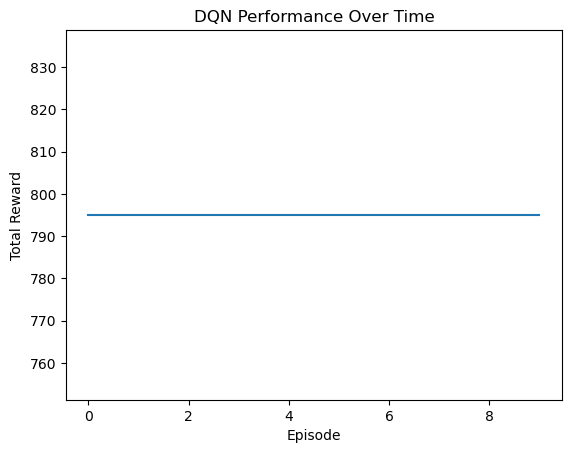

In [66]:
import matplotlib.pyplot as plt
plt.plot(episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("DQN Performance Over Time")
plt.show()


In [67]:
torch.save(agent.model.state_dict(), "dqn_credit_scorer.pth")


In [68]:

episode_rewards = []

for episode in range(10):  # try more episodes later
    # Shuffle data
    shuffled_df = df.sample(frac=1).reset_index(drop=True)
    env = CreditScoringEnv(shuffled_df)

    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state if next_state is not None else state, done)
        state = next_state if next_state is not None else state
        total_reward += reward

    agent.replay(batch_size=32)
    episode_rewards.append(total_reward)
    print(f"Episode {episode+1} — Reward: {total_reward:.0f} — Epsilon: {agent.epsilon:.3f}")


Episode 1 — Reward: 859 — Epsilon: 0.946
Episode 2 — Reward: 867 — Epsilon: 0.942
Episode 3 — Reward: 827 — Epsilon: 0.937
Episode 4 — Reward: 1161 — Epsilon: 0.932
Episode 5 — Reward: 1331 — Epsilon: 0.928
Episode 6 — Reward: 1125 — Epsilon: 0.923
Episode 7 — Reward: 1375 — Epsilon: 0.918
Episode 8 — Reward: 1457 — Epsilon: 0.914
Episode 9 — Reward: 1311 — Epsilon: 0.909
Episode 10 — Reward: 1839 — Epsilon: 0.905


In [69]:

state = env.reset()
print("Action taken for first few states:")
for _ in range(5):
    print("Action:", agent.act(state))
    state, _, done, _ = env.step(agent.act(state))


Action taken for first few states:
Action: 0
Action: 0
Action: 1
Action: 1
Action: 1


In [70]:
episode_rewards = []

for episode in range(episodes):
    ...
    episode_rewards.append(total_reward)


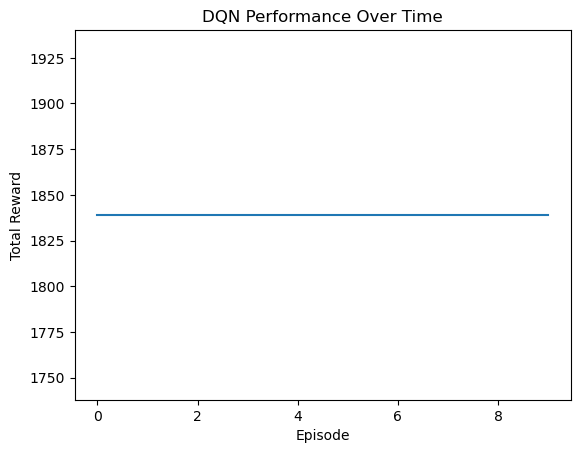

In [71]:
import matplotlib.pyplot as plt
plt.plot(episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("DQN Performance Over Time")
plt.show()


In [72]:
episode_rewards = []

# reset exploration
agent.epsilon = 1.0
agent.epsilon_min = 0.1
agent.epsilon_decay = 0.98

for episode in range(50):  # increase episodes
    shuffled_df = df.sample(frac=1).reset_index(drop=True)
    env = CreditScoringEnv(shuffled_df)

    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.act(state)
        
        # reward shaping
        true_label = env.labels[env.current_index]
        if action == true_label:
            reward = 2 if true_label == 1 else 1
        else:
            reward = -3 if true_label == 1 else -1

        next_state, _, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state if next_state is not None else state, done)
        state = next_state if next_state is not None else state
        total_reward += reward

    agent.replay(batch_size=64)  # slightly larger batch
    episode_rewards.append(total_reward)
    print(f"Episode {episode+1} — Reward: {total_reward:.0f} — Epsilon: {agent.epsilon:.3f}")


Episode 1 — Reward: -2630 — Epsilon: 0.980
Episode 2 — Reward: -2904 — Epsilon: 0.960
Episode 3 — Reward: -2694 — Epsilon: 0.941
Episode 4 — Reward: -2223 — Epsilon: 0.922
Episode 5 — Reward: -2082 — Epsilon: 0.904
Episode 6 — Reward: -1608 — Epsilon: 0.886
Episode 7 — Reward: -1270 — Epsilon: 0.868
Episode 8 — Reward: -750 — Epsilon: 0.851
Episode 9 — Reward: -818 — Epsilon: 0.834
Episode 10 — Reward: -152 — Epsilon: 0.817
Episode 11 — Reward: 212 — Epsilon: 0.801
Episode 12 — Reward: -382 — Epsilon: 0.785
Episode 13 — Reward: -127 — Epsilon: 0.769
Episode 14 — Reward: 1172 — Epsilon: 0.754
Episode 15 — Reward: 1079 — Epsilon: 0.739
Episode 16 — Reward: 1561 — Epsilon: 0.724
Episode 17 — Reward: 1491 — Epsilon: 0.709
Episode 18 — Reward: 1729 — Epsilon: 0.695
Episode 19 — Reward: 2040 — Epsilon: 0.681
Episode 20 — Reward: 2305 — Epsilon: 0.668
Episode 21 — Reward: 2705 — Epsilon: 0.654
Episode 22 — Reward: 3109 — Epsilon: 0.641
Episode 23 — Reward: 3185 — Epsilon: 0.628
Episode 24 — R

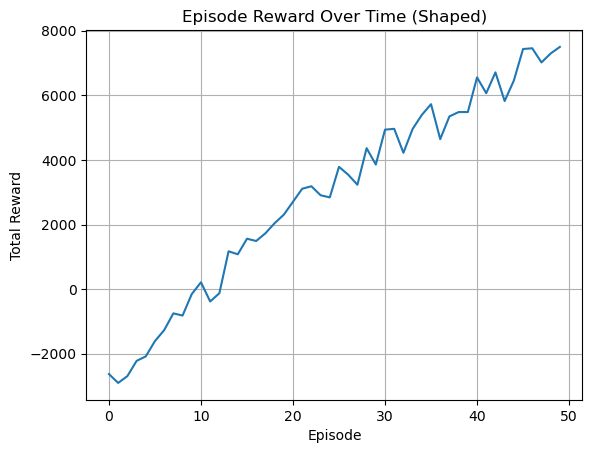

In [73]:
import matplotlib.pyplot as plt
plt.plot(episode_rewards)
plt.title("Episode Reward Over Time (Shaped)")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()


In [74]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [168]:
env = CreditScoringEnv(train_df)
agent = DQNAgent(state_size=env.observation_space.shape[0], action_size=env.action_space.n)

agent.epsilon = 1.0
agent.epsilon_decay = 0.97
agent.epsilon_min = 0.1

episode_rewards = []

# same loop logic as before using shuffled train_df
for episode in range(50):  # increase episodes
    shuffled_df = train_df.sample(frac=1).reset_index(drop=True)
    env = CreditScoringEnv(shuffled_df)

    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.act(state)
        
        # reward shaping
        true_label = env.labels[env.current_index]
        if action == true_label:
            reward = 2 if true_label == 1 else 1
        else:
            reward = -3 if true_label == 1 else -1

        next_state, _, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state if next_state is not None else state, done)
        state = next_state if next_state is not None else state
        total_reward += reward

    agent.replay(batch_size=64)  # slightly larger batch
    episode_rewards.append(total_reward)
    print(f"Episode {episode+1} — Reward: {total_reward:.0f} — Epsilon: {agent.epsilon:.3f}")



AttributeError: 'CreditScoringEnv' object has no attribute 'observation_space'

In [76]:
from sklearn.metrics import classification_report

# Create test environment
test_env = CreditScoringEnv(test_df)

# Run agent on unseen borrowers
y_true = []
y_pred = []

state = test_env.reset()
done = False

while not done:
    action = agent.act(state)
    y_pred.append(action)
    y_true.append(test_env.labels[test_env.current_index])
    state, _, done, _ = test_env.step(action)

# Print performance
print("RL Agent Validation on Unseen Test Data:\n")
print(classification_report(y_true, y_pred, target_names=["No Default", "Default"]))


RL Agent Validation on Unseen Test Data:

              precision    recall  f1-score   support

  No Default       0.86      0.73      0.79      4631
     Default       0.38      0.58      0.46      1336

    accuracy                           0.70      5967
   macro avg       0.62      0.66      0.63      5967
weighted avg       0.75      0.70      0.72      5967



In [77]:
torch.save(agent.model.state_dict(), "dqn_credit_model.pth")
print("Model saved as dqn_credit_model.pth")


Model saved as dqn_credit_model.pth


In [78]:
import pickle

feature_columns = train_df.drop(columns=["default.payment.next.month"]).columns.tolist()

with open("feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)


In [180]:
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Final feature set
selected_features = ["LIMIT_BAL", "AGE_GROUP", "DTI", "AVG_BILL_AMT", "AVG_PAY_AMT", "OVERDUE_COUNT"]

# Environment with balanced reward
class CreditScoringEnv:
    def __init__(self, df):
        self.df = df.reset_index(drop=True)
        self.features = selected_features
        self.labels = df["default.payment.next.month"].values
        self.current_index = 0
        self.done = False

    def reset(self):
        self.current_index = 0
        self.done = False
        return self.df.loc[self.current_index, self.features].values

    def step(self, action):
        reward = 1 if action == self.labels[self.current_index] else -1


        self.current_index += 1
        done = self.current_index >= len(self.df)
        next_state = None if done else self.df.loc[self.current_index, self.features].values

        return next_state, reward, done, {}


# Q-network
class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(QNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.model(x)

# DQN agent with slower epsilon decay
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.model = QNetwork(state_size, action_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.criterion = nn.MSELoss()
        self.memory = []
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.1

    def act(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, 1)
        state = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            return torch.argmax(self.model(state)).item()

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        if len(self.memory) > 2000:
            self.memory.pop(0)

    def replay(self, batch_size=128):
        if len(self.memory) < batch_size:
            return
        batch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in batch:
            state_tensor = torch.FloatTensor(state)
            target = self.model(state_tensor).detach().clone()
            if not done:
                next_q = torch.max(self.model(torch.FloatTensor(next_state)))
                target[action] = reward + self.gamma * next_q
            else:
                target[action] = reward
            output = self.model(state_tensor)
            loss = self.criterion(output, target)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
# Train
env = CreditScoringEnv(train_df)
agent = DQNAgent(state_size=len(selected_features), action_size=2)

for episode in range(300):
    env = CreditScoringEnv(train_df.sample(frac=1).reset_index(drop=True))
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state if next_state is not None else state, done)
        state = next_state if next_state is not None else state
        total_reward += reward
    agent.replay(batch_size=128)
    agent.epsilon = max(agent.epsilon_min, agent.epsilon - (1.0 - agent.epsilon_min)/300)
    print(f"Episode {episode+1} — Reward: {total_reward:.0f} — Epsilon: {agent.epsilon:.3f}")

# Save new model
torch.save(agent.model.state_dict(), "dqn_credit_model.pth")
print("✅ New model saved: dqn_credit_model.pth")



Episode 1 — Reward: -294 — Epsilon: 0.997
Episode 2 — Reward: -10 — Epsilon: 0.994
Episode 3 — Reward: -68 — Epsilon: 0.991
Episode 4 — Reward: 344 — Epsilon: 0.988
Episode 5 — Reward: 244 — Epsilon: 0.985
Episode 6 — Reward: 248 — Epsilon: 0.982
Episode 7 — Reward: 264 — Epsilon: 0.979
Episode 8 — Reward: 384 — Epsilon: 0.976
Episode 9 — Reward: 786 — Epsilon: 0.973
Episode 10 — Reward: 448 — Epsilon: 0.970
Episode 11 — Reward: 302 — Epsilon: 0.967
Episode 12 — Reward: 256 — Epsilon: 0.964
Episode 13 — Reward: 590 — Epsilon: 0.961
Episode 14 — Reward: 396 — Epsilon: 0.958
Episode 15 — Reward: 734 — Epsilon: 0.955
Episode 16 — Reward: 1126 — Epsilon: 0.952
Episode 17 — Reward: 664 — Epsilon: 0.949
Episode 18 — Reward: 660 — Epsilon: 0.946
Episode 19 — Reward: 1128 — Epsilon: 0.943
Episode 20 — Reward: 980 — Epsilon: 0.940
Episode 21 — Reward: 852 — Epsilon: 0.937
Episode 22 — Reward: 664 — Epsilon: 0.934
Episode 23 — Reward: 1008 — Epsilon: 0.931
Episode 24 — Reward: 942 — Epsilon: 0.9

In [182]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import torch


# Use same 6 features
selected_features = ["LIMIT_BAL", "AGE_GROUP", "DTI", "AVG_BILL_AMT", "AVG_PAY_AMT", "OVERDUE_COUNT"]
X = df[selected_features]
y = df["default.payment.next.month"]

# Split into unseen test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reload model architecture (same as training)
class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(QNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.model(x)

# Initialize and load model
model = QNetwork(input_dim=6, output_dim=2)
model.load_state_dict(torch.load("dqn_credit_model.pth"))
model.eval()

# Evaluate on test set
y_pred = []
for i in range(len(X_test)):
    state = torch.FloatTensor(X_test.iloc[i].values).unsqueeze(0)
    with torch.no_grad():
        action = torch.argmax(model(state)).item()
    y_pred.append(action)

# Report
print("📊 Validation Performance on Test Split:\n")
print(classification_report(y_test, y_pred, target_names=["No Default", "Default"]))


📊 Validation Performance on Test Split:

              precision    recall  f1-score   support

  No Default       0.83      0.95      0.88      4631
     Default       0.64      0.33      0.43      1336

    accuracy                           0.81      5967
   macro avg       0.74      0.64      0.66      5967
weighted avg       0.79      0.81      0.78      5967



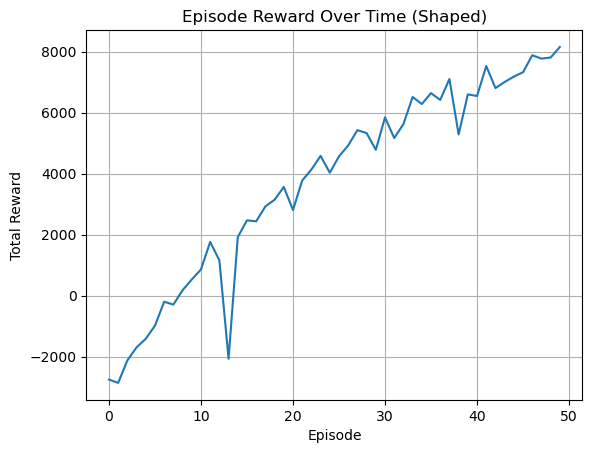

In [81]:
import matplotlib.pyplot as plt
plt.plot(episode_rewards)
plt.title("Episode Reward Over Time (Shaped)")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()